In [20]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
def gen_data(n, h, sd1, sd2):
    x1 = ss.norm.rvs(-h, sd1, n)
    y1 = ss.norm.rvs(0, sd1, n)
    x2 = ss.norm.rvs(h, sd1, n)
    y2 = ss.norm.rvs(0, sd1, n)
    return (x1, y1, x2, y2)

In [3]:
(x1, y1, x2, y2) = gen_data(50, 1, 1, 1.5)

In [4]:
(x1, y1, x2, y2) = gen_data(1000, 1.5, 1, 1.5)

In [5]:
def plot_data(x1, y1, x2, y2):
    plt.figure()
    plt.plot(x1, y1, "o", ms=2)
    plt.plot(x2, y2, "o", ms=2)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

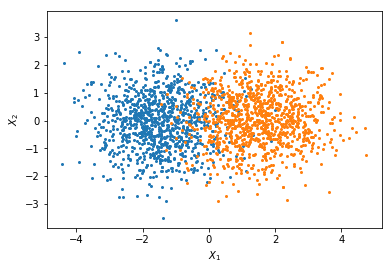

In [6]:
plot_data(x1, y1, x2, y2)

Instead of using p(X) = &beta;<sub>0</sub> + &beta;<sub>1</sub>X<sub>1</sub> + ... + &beta;<sub>p</sub>X<sub>p</sub>, we can use:

log(p(X)/(1-p(X))) = &beta;<sub>0</sub> + &beta;<sub>1</sub>X<sub>1</sub> + ... + &beta;<sub>p</sub>X<sub>p</sub>

In [7]:
def prob_to_odds(p): 
    if p <= 0 or p >= 1: 
        print("Probabilities must be between 0 and 1.") 
    return p / (1-p) 

In [8]:
prob_to_odds(0.8)

4.000000000000001

In [9]:
clf = LogisticRegression()

In [10]:
X = np.vstack((np.vstack((x1, y1)).T, np.vstack((x2, y2)).T))

In [11]:
n = 1000
y = np.hstack((np.repeat(1,n), np.repeat(2,n)))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)

/home/clementpoiret/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [13]:
X_test.shape, y_test.shape

((1000, 2), (1000,))

In [14]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
clf.score(X_test, y_test)

0.94

In [16]:
test_predict = clf.predict_proba(np.array([-2, 0]).reshape(1, -1))
class1_prob = test_predict[0][0]
class2_prob = test_predict[0][1]

print("Class1 probability =", class1_prob)
print("Class2 probability =", class2_prob)

Class1 probability = 0.9957052351817005
Class2 probability = 0.004294764818299458


In [17]:
clf.predict(np.array([-2, 0]).reshape(1, -1))

array([1])

In [18]:
def plot_probs(ax, clf, class_no):
    xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))
    Z = probs[:,class_no]
    Z = Z.reshape(xx1.shape)
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

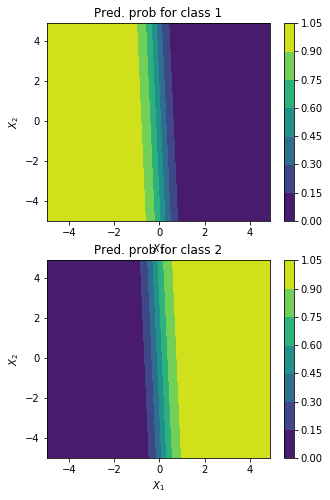

In [19]:
plt.figure(figsize=(5,8))
ax = plt.subplot(211)
plot_probs(ax, clf, 0)
plt.title("Pred. prob for class 1")
ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred. prob for class 2");